In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [7]:
r_min = 2
dr = 0.1

In [13]:
r_min = 2
r_max = 10
min_seq_sep = 6

In [9]:
r = 4.8
int((r-r_min)/dr)

27

In [58]:
pdb_list = glob.glob("/Users/weilu/Research/database/Alpha-helical_polytopic/*.pdb")

In [59]:
len(pdb_list)

3433

In [97]:
r_min = 2
r_max = 10
min_seq_sep = 6

dr = 0.1
r_table = np.arange(r_min, r_max+10, dr)
n = len(r_table)
parser = PDBParser(QUIET=1)
cb_cb_table = np.zeros((20, 20, n))
count = 0

for pdb in pdb_list[:100]:
    pdbName = pdb.split("/")[-1][:-4]
    one_cb_cb_table = np.zeros((20, 20, n))
    count += 1
    print(pdb)
    structure = parser.get_structure('X', pdb)
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    try:
        cb_density = calculate_cb_density(res_list, neighbor_list)
    except:
        print(f"problem pdb: {pdb}, skip")
        continue
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        rho_i = cb_density[res1globalindex]
        for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)
            rho_j = cb_density[res2globalindex]
            if res2index - res1index >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
                res1type = get_res_type(res_list, res1)
                res2type = get_res_type(res_list, res2)
                rij = get_interaction_distance(res1, res2)
                position = int(np.rint((rij-r_min)/dr))
                if position < 0 or position >= n:
                    print(res1index, res2index, rij, "outside the table")
                else:
                    one_cb_cb_table[res1type][res2type][position] += 1
                    one_cb_cb_table[res2type][res1type][position] += 1
    np.save(f"/Users/weilu/Research/database/cb_cb_distance/{pdbName}.npy", one_cb_cb_table)

/Users/weilu/Research/database/Alpha-helical_polytopic/6ctd.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/5tin.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/6fkb.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/5vpn.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/1qhj.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/2mgy.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/2zd9.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/5vrf.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/6dqn.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/6hef.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/4wis.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/6ds0.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/6cvl.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/6f0u.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/3pbl.pdb
/Users/weilu/Research/database/Alpha-hel

In [99]:
r_min = 2
r_max = 10
min_seq_sep = 6

dr = 0.1
r_table = np.arange(r_min, r_max+10, dr)
n = len(r_table)
parser = PDBParser(QUIET=1)
cb_cb_table = np.zeros((20, 20, n))
count = 0

for pdb in pdb_list[105:500]:
    pdbName = pdb.split("/")[-1][:-4]
    one_cb_cb_table = np.zeros((20, 20, n))
    count += 1
    print(pdb)
    try:
        structure = parser.get_structure('X', pdb)
        res_list = get_res_list(structure)
        neighbor_list = get_neighbor_list(structure)
        cb_density = calculate_cb_density(res_list, neighbor_list)
    except:
        print(f"problem pdb: {pdb}, skip")
        continue
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        rho_i = cb_density[res1globalindex]
        for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)
            rho_j = cb_density[res2globalindex]
            if res2index - res1index >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
                res1type = get_res_type(res_list, res1)
                res2type = get_res_type(res_list, res2)
                rij = get_interaction_distance(res1, res2)
                position = int(np.rint((rij-r_min)/dr))
                if position < 0 or position >= n:
                    print(res1index, res2index, rij, "outside the table")
                else:
                    one_cb_cb_table[res1type][res2type][position] += 1
                    one_cb_cb_table[res2type][res1type][position] += 1
    np.save(f"/Users/weilu/Research/database/cb_cb_distance/{pdbName}.npy", one_cb_cb_table)

/Users/weilu/Research/database/Alpha-helical_polytopic/4v7i.pdb
problem pdb: /Users/weilu/Research/database/Alpha-helical_polytopic/4v7i.pdb, skip
/Users/weilu/Research/database/Alpha-helical_polytopic/1ezv.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/4v6m.pdb
need debug <Residue ARG het=  resseq=49 icode= >
problem pdb: /Users/weilu/Research/database/Alpha-helical_polytopic/4v6m.pdb, skip
/Users/weilu/Research/database/Alpha-helical_polytopic/3zux.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/2nww.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/3f3c.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/2los.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/1p49.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/5ywd.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/6et5.pdb
need debug <Residue ALA het=  resseq=333 icode= >
problem pdb: /Users/weilu/Research/database/Alpha-helical_polytopic/6et5.pdb, skip
/Users/weilu

/Users/weilu/Research/database/Alpha-helical_polytopic/5xsy.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/5osc.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/5d5b.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/2j8c.pdb
need debug <Residue MET het=  resseq=303 icode= >
problem pdb: /Users/weilu/Research/database/Alpha-helical_polytopic/2j8c.pdb, skip
/Users/weilu/Research/database/Alpha-helical_polytopic/6f0v.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/6mvw.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/6mwd.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/2xq9.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/4wfh.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/6qd5.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/4ryn.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/2cfq.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/4il9.pdb
/Users/weilu/Research/database/Alph

/Users/weilu/Research/database/Alpha-helical_polytopic/5unh.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/2l6x.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/3aou.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/3tt1.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/6g9o.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/2wwa.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/3fh6.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/3spi.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/3zmj.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/4mm8.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/6ebm.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/3sfd.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/1bgy.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/4xtc.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/4d1c.pdb
/Users/weilu/Research/database/Alpha-hel

/Users/weilu/Research/database/Alpha-helical_polytopic/3nka.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/4gby.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/4pa9.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/6ffc.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/4g7r.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/5hcm.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/5vhy.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/4lde.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/5ofp.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/5f8u.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/5x0m.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/5svl.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/5fn3.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/6qpc.pdb
/Users/weilu/Research/database/Alpha-helical_polytopic/6djb.pdb
/Users/weilu/Research/database/Alpha-hel

In [ ]:
r_min = 2
r_max = 10
min_seq_sep = 6

dr = 0.1
r_table = np.arange(r_min, r_max+10, dr)
n = len(r_table)
parser = PDBParser(QUIET=1)
cb_cb_table = np.zeros((20, 20, n))
count = 0

for pdb in pdb_list[500:]:
    pdbName = pdb.split("/")[-1][:-4]
    one_cb_cb_table = np.zeros((20, 20, n))
    count += 1
    print(pdb)
    structure = parser.get_structure('X', pdb)
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    try:
        cb_density = calculate_cb_density(res_list, neighbor_list)
    except:
        print(f"problem pdb: {pdb}, skip")
        continue
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        rho_i = cb_density[res1globalindex]
        for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)
            rho_j = cb_density[res2globalindex]
            if res2index - res1index >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
                res1type = get_res_type(res_list, res1)
                res2type = get_res_type(res_list, res2)
                rij = get_interaction_distance(res1, res2)
                position = int(np.rint((rij-r_min)/dr))
                if position < 0 or position >= n:
                    print(res1index, res2index, rij, "outside the table")
                else:
                    one_cb_cb_table[res1type][res2type][position] += 1
                    one_cb_cb_table[res2type][res1type][position] += 1
    np.save(f"/Users/weilu/Research/database/cb_cb_distance/{pdbName}.npy", one_cb_cb_table)

In [75]:
rough = np.argmax(cb_cb_table>=1, axis=2)
size = 20
interaction_matrix = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        index1 = hydrophobicity_map[inverse_res_type_map[i]]
        index2 = hydrophobicity_map[inverse_res_type_map[j]] 
        interaction_matrix[index1][index2] += rough[i][j]


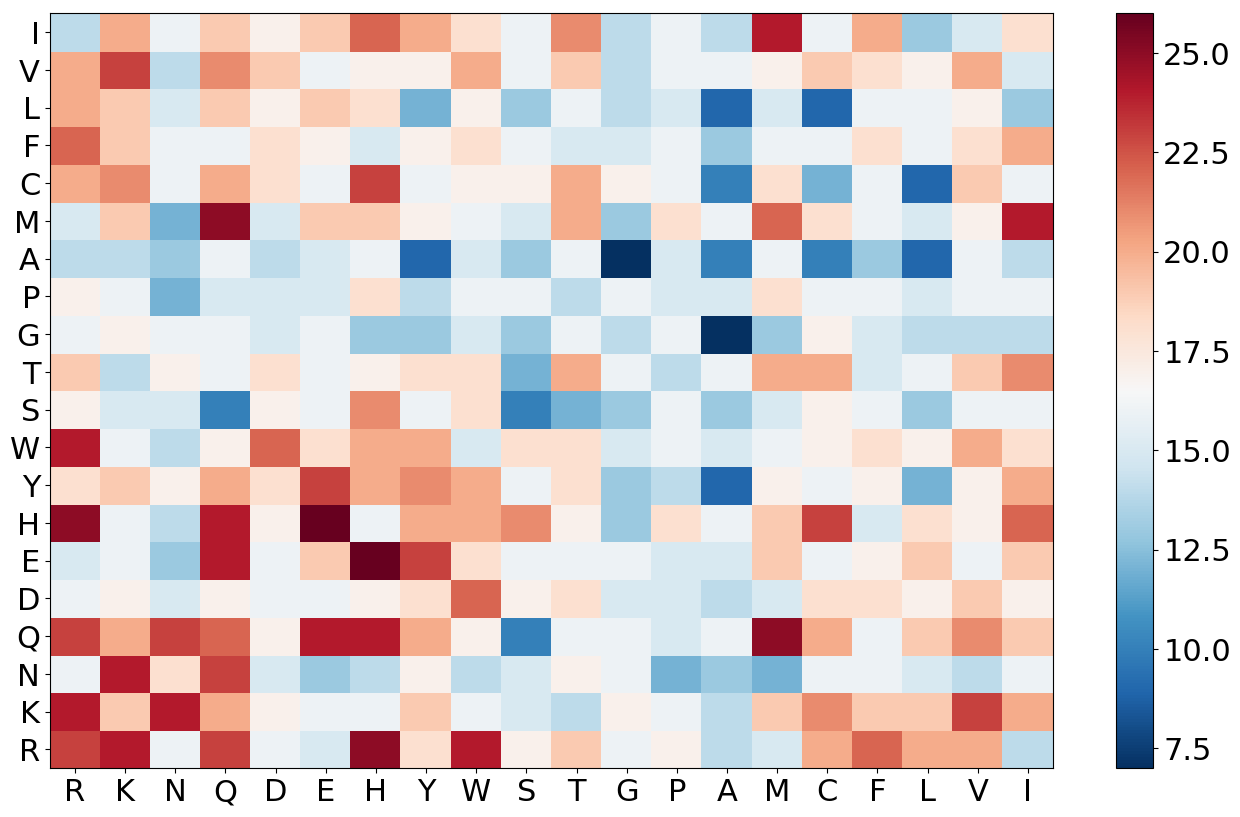

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.pcolor(interaction_matrix, cmap="RdBu_r")
fig.colorbar(cax)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(interaction_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(interaction_matrix.shape[1]) + 0.5, minor=False)

_ = ax.set_xticklabels(hydrophobicity_letters)
_ = ax.set_yticklabels(hydrophobicity_letters)

In [79]:
parser = PDBParser(QUIET=1)
structure = parser.get_structure('X', "/Users/weilu/Research/database/Alpha-helical_polytopic/2a06.pdb")
res_list = get_res_list(structure)
neighbor_list = get_neighbor_list(structure)

In [91]:
try:
    cb_density = calculate_cb_density(res_list, neighbor_list)
except:
    print("problem, skip")
r_min = 2
r_max = 10
min_seq_sep = 6

dr = 0.1
r_table = np.arange(r_min, r_max+10, dr)
n = len(r_table)

cb_cb_table = np.zeros((20, 20, n))

for res1globalindex, res1 in enumerate(res_list):
    res1index = get_local_index(res1)
    res1chain = get_chain(res1)
    rho_i = cb_density[res1globalindex]
    for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
        res2index = get_local_index(res2)
        res2chain = get_chain(res2)
        res2globalindex = get_global_index(res_list, res2)
        rho_j = cb_density[res2globalindex]
        if res2index - res1index >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
            res1type = get_res_type(res_list, res1)
            res2type = get_res_type(res_list, res2)
            try:
                rij = get_interaction_distance(res1, res2)
            except:
                break
            position = int(np.rint((rij-r_min)/dr))
            if position < 0 or position >= 100:
                print(res1index, res2index, rij, "outside the table")
            else:
                cb_cb_table[res1type][res2type][position] += 1
                cb_cb_table[res2type][res1type][position] += 1

need debug <Residue TRP het=  resseq=443 icode= >
problem, skip


IndexError: index 643 is out of bounds for axis 0 with size 588

In [87]:
list(res1.get_atoms())[0]

<Atom N>

In [39]:
cb_cb_table.shape

(20, 20, 180)

In [42]:
np.sum(cb_cb_table)

14488.0

In [46]:
cb_cb_table[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 4., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 0., 2., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

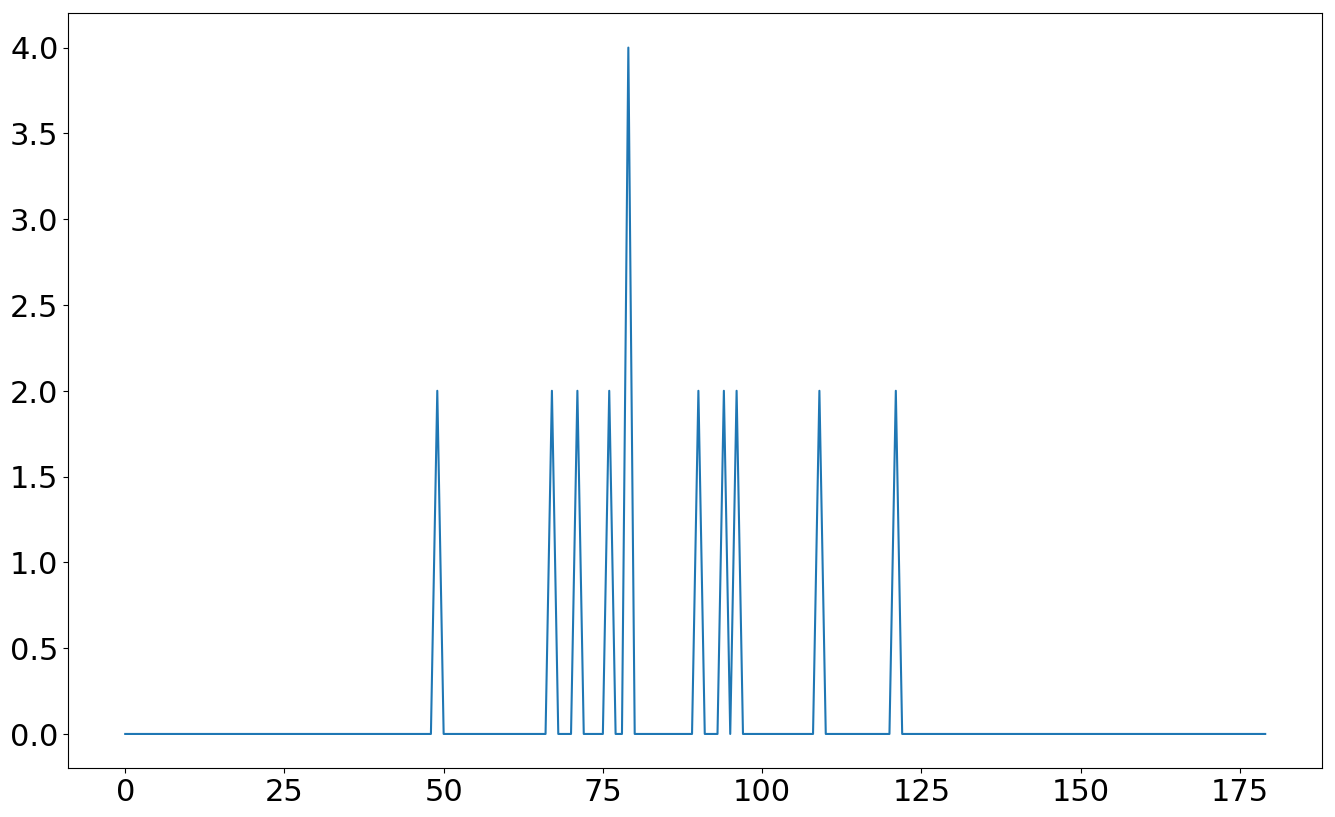

In [47]:
plt.plot(cb_cb_table[0][0])

In [48]:
rough = np.argmax(cb_cb_table>=1, axis=2)

In [54]:
size = 20
interaction_matrix = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        index1 = hydrophobicity_map[inverse_res_type_map[i]]
        index2 = hydrophobicity_map[inverse_res_type_map[j]] 
        interaction_matrix[index1][index2] += rough[i][j]

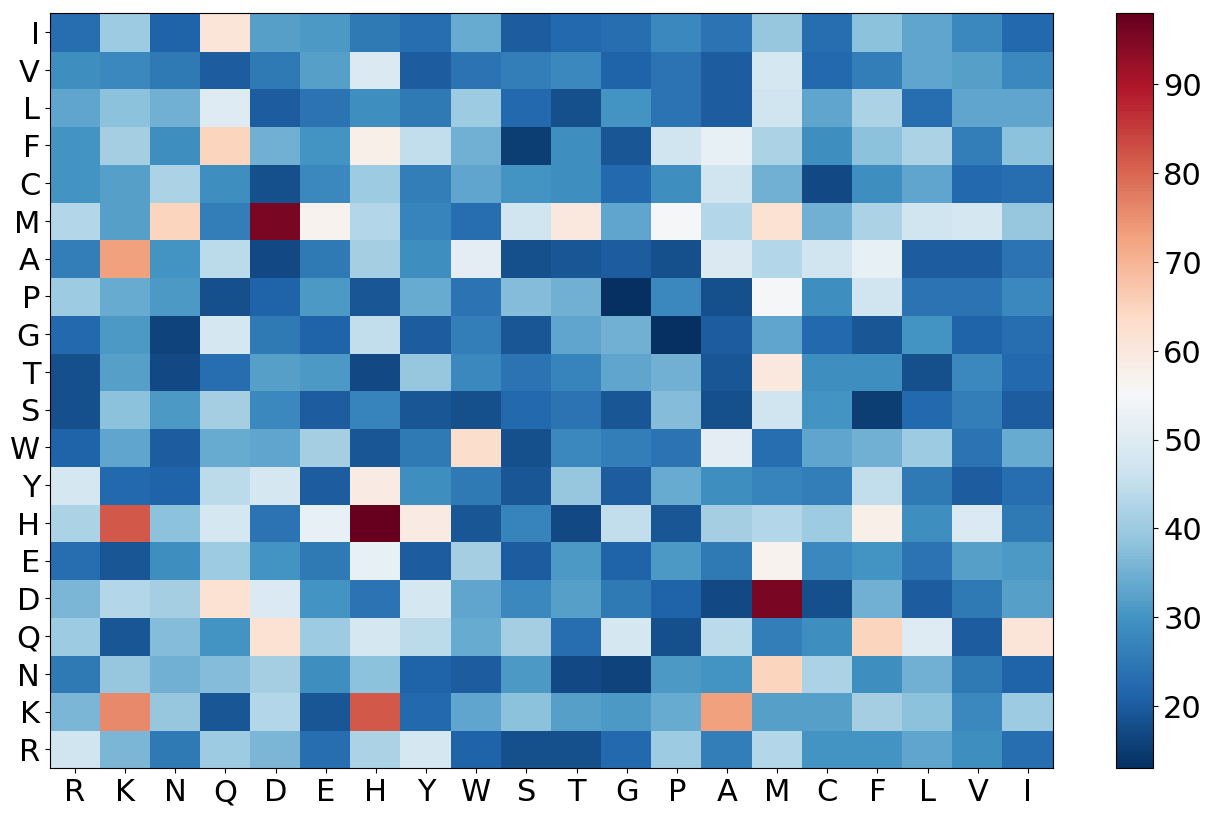

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.pcolor(interaction_matrix, cmap="RdBu_r")
fig.colorbar(cax)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(interaction_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(interaction_matrix.shape[1]) + 0.5, minor=False)

_ = ax.set_xticklabels(hydrophobicity_letters)
_ = ax.set_yticklabels(hydrophobicity_letters)

In [ ]:
index1 = hydrophobicity_map[inverse_res_type_map[i]]
index2 = hydrophobicity_map[inverse_res_type_map[j]]

In [53]:
rough - rough.T

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

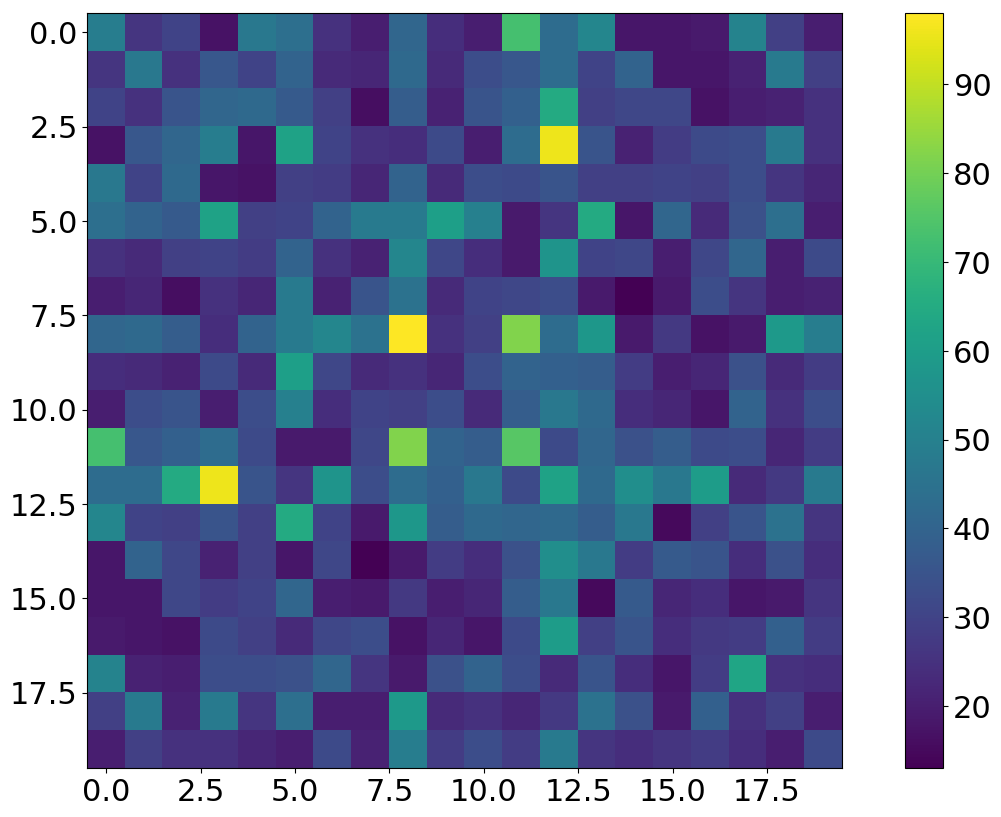

In [51]:
plt.imshow(rough)
plt.colorbar()